In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
olivetti_faces = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


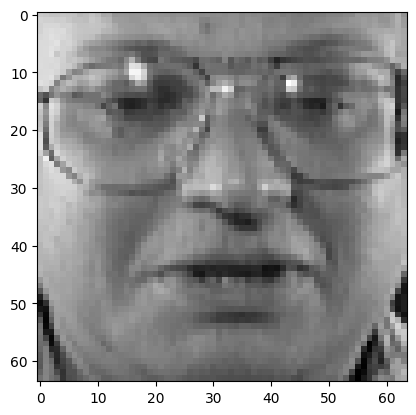

In [3]:
import matplotlib.pyplot as plt

face = olivetti_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [4]:
olivetti_faces.data[1]

array([0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
       0.6528926 ], dtype=float32)

In [5]:
olivetti_faces.target

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

In [6]:
set(olivetti_faces.target.tolist())

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39}

In [7]:
import torch
import torch.nn as nn

In [8]:
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)

In [9]:
images.shape

torch.Size([400, 4096])

In [10]:
targets.shape

torch.Size([400])

In [11]:
# device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [12]:
from sklearn.model_selection import train_test_split


In [13]:

X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

dataset = [(img,lbl) for img,lbl in zip(X_train, y_train)]
dataset[0]

dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [14]:
LR = 0.01
epochs = 20

In [17]:
def model_train_(model, optimizer):
    # 损失函数&优化器
    loss_fn = nn.CrossEntropyLoss()

    loss_list = []

    for epoch in range(epochs):
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            # 前向运算
            output = model(data)
            # 计算损失
            loss = loss_fn(output, target)
            # 反向传播
            optimizer.zero_grad()   # 梯度清零
            loss.backward()         # 反向传播
            optimizer.step()        # 更新参数
        loss_list.append(loss.item())
        
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')
    
    plt.plot(loss_list)


Epoch 1/20, Loss: 8.682012557983398
Epoch 2/20, Loss: 3.259352922439575
Epoch 3/20, Loss: 3.936711072921753
Epoch 4/20, Loss: 10.536456108093262
Epoch 5/20, Loss: 2.5971341133117676
Epoch 6/20, Loss: 3.2263100147247314
Epoch 7/20, Loss: 3.220614194869995
Epoch 8/20, Loss: 1.3211404085159302
Epoch 9/20, Loss: 0.444138765335083
Epoch 10/20, Loss: 1.2479865550994873
Epoch 11/20, Loss: 2.0546696186065674
Epoch 12/20, Loss: 4.296323776245117
Epoch 13/20, Loss: 0.5614727139472961
Epoch 14/20, Loss: 1.4394164085388184
Epoch 15/20, Loss: 1.6793724298477173
Epoch 16/20, Loss: 0.4202173352241516
Epoch 17/20, Loss: 1.9692656993865967
Epoch 18/20, Loss: 0.8847840428352356
Epoch 19/20, Loss: 0.006045651622116566
Epoch 20/20, Loss: 0.33866411447525024


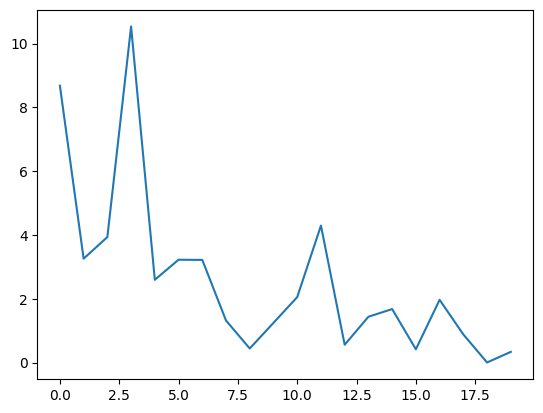

In [20]:
# 定义模型
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(8192, 4096),
    nn.BatchNorm1d(4096),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(4096, 2048),
    nn.BatchNorm1d(2048),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(2048, 40),
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
model_train_(model, optimizer)

Epoch 1/20, Loss: 2.8051743507385254
Epoch 2/20, Loss: 1.8199284076690674
Epoch 3/20, Loss: 1.3651196956634521
Epoch 4/20, Loss: 0.7838221192359924
Epoch 5/20, Loss: 0.5804823040962219
Epoch 6/20, Loss: 0.5274483561515808
Epoch 7/20, Loss: 0.29626041650772095
Epoch 8/20, Loss: 0.2494461089372635
Epoch 9/20, Loss: 0.11123402416706085
Epoch 10/20, Loss: 0.13918708264827728
Epoch 11/20, Loss: 0.13496026396751404
Epoch 12/20, Loss: 0.17369170486927032
Epoch 13/20, Loss: 0.18861603736877441
Epoch 14/20, Loss: 0.18043722212314606
Epoch 15/20, Loss: 0.12662450969219208
Epoch 16/20, Loss: 0.1860080063343048
Epoch 17/20, Loss: 0.06211546063423157
Epoch 18/20, Loss: 0.22318749129772186
Epoch 19/20, Loss: 0.02509983256459236
Epoch 20/20, Loss: 0.08804197609424591


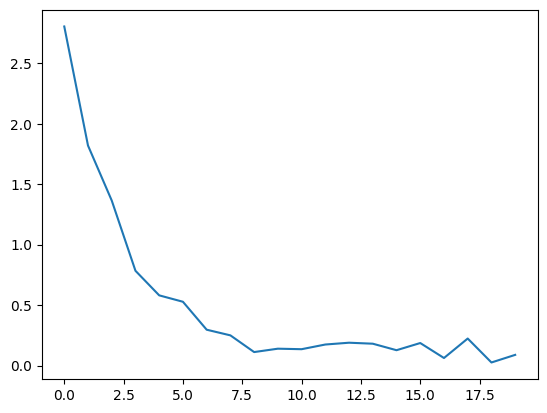

In [21]:
# 定义模型
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(8192, 4096),
    nn.BatchNorm1d(4096),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(4096, 2048),
    nn.BatchNorm1d(2048),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(2048, 40),
).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
model_train_(model, optimizer)

Epoch 1/20, Loss: 13.193903923034668
Epoch 2/20, Loss: 6.701761722564697
Epoch 3/20, Loss: 5.992152214050293
Epoch 4/20, Loss: 5.996917247772217
Epoch 5/20, Loss: 4.198359966278076
Epoch 6/20, Loss: 3.8522250652313232
Epoch 7/20, Loss: 2.3907663822174072
Epoch 8/20, Loss: 2.38621187210083
Epoch 9/20, Loss: 1.3156276941299438
Epoch 10/20, Loss: 1.2622092962265015
Epoch 11/20, Loss: 1.5484338998794556
Epoch 12/20, Loss: 1.3860448598861694
Epoch 13/20, Loss: 0.2030436247587204
Epoch 14/20, Loss: 0.17011313140392303
Epoch 15/20, Loss: 0.5604051351547241
Epoch 16/20, Loss: 1.037022352218628
Epoch 17/20, Loss: 1.3260430097579956
Epoch 18/20, Loss: 0.849030613899231
Epoch 19/20, Loss: 0.46198445558547974
Epoch 20/20, Loss: 0.3508453667163849


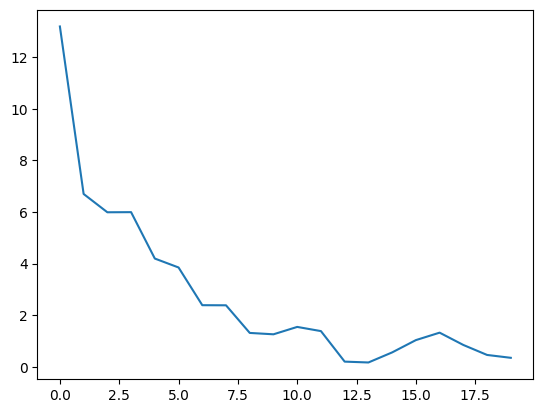

In [22]:
# 定义模型
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(8192, 4096),
    nn.BatchNorm1d(4096),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(4096, 2048),
    nn.BatchNorm1d(2048),
    nn.Dropout(),
    nn.ReLU(),
    nn.Linear(2048, 40),
).to(device)
optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)
model_train_(model, optimizer)